“What profiles of smartphone usage among teenagers are most predictive of negative academic and mental health outcomes?”

In [ ]:
# Core data libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

# Clustering
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd

# Load the uploaded CSV file (from your local upload)
data = pd.read_csv('/content/teen_phone_addiction_dataset.csv')

# Check first few rows and structure
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [ ]:
import pandas as pd

data = pd.read_csv('/content/teen_phone_addiction_dataset.csv')
print(data.columns.tolist())


['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']


Data shape: (3000, 25)
Columns: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']
Training size: (2400, 6)
Testing size: (600, 6)

📊 Academic Performance Model → RMSE: 15.060, R²: -0.007
📊 Depression Model → RMSE: 2.838, R²: -0.006


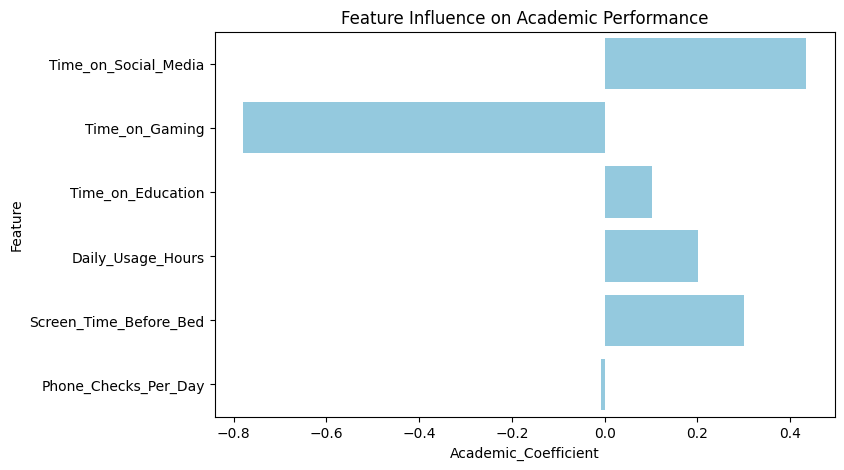

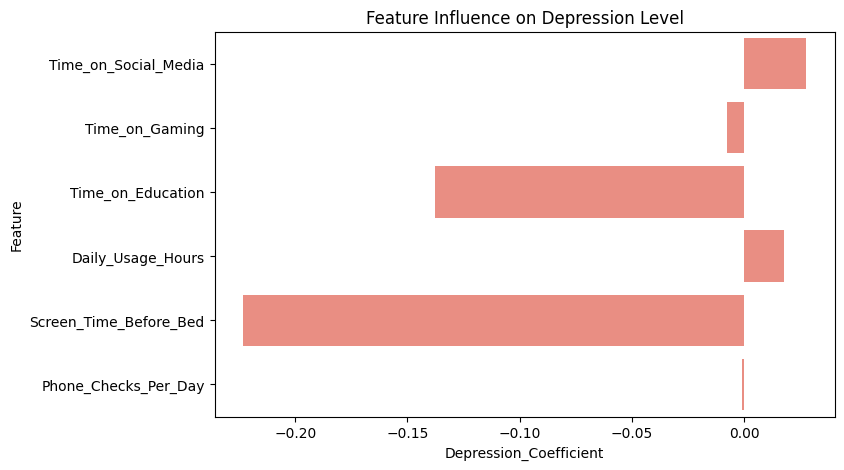

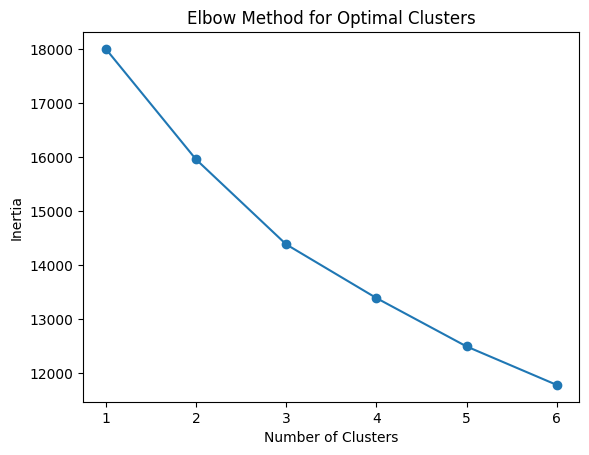


📈 Profile Summary:
         Academic_Performance  Depression_Level  Anxiety_Level  \
Profile                                                          
0                       74.75              5.53           5.55   
1                       75.00              5.42           5.65   
2                       75.09              5.43           5.59   

         Daily_Usage_Hours  Time_on_Social_Media  Time_on_Gaming  \
Profile                                                            
0                     4.74                  2.34            1.55   
1                     5.35                  2.54            1.48   
2                     5.02                  2.61            1.53   

         Time_on_Education  Screen_Time_Before_Bed  
Profile                                             
0                     0.66                    0.85  
1                     1.73                    1.18  
2                     0.79                    1.02  


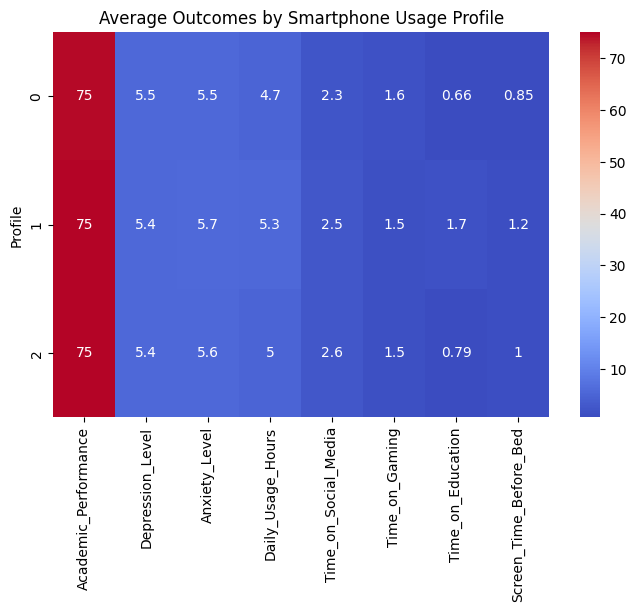

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------------------------------------
# 2. Load data
# ------------------------------------------------------------
data = pd.read_csv('/content/teen_phone_addiction_dataset.csv')
print("Data shape:", data.shape)
print("Columns:", data.columns.tolist())

# ------------------------------------------------------------
# 3. Filter for teenagers (if needed)
# ------------------------------------------------------------
# Your dataset already appears to contain teens, but keep only valid ages
teen_data = data[data['Age'].between(13, 19)].copy()

# ------------------------------------------------------------
# 4. Select predictors & outcomes
# ------------------------------------------------------------
predictors = ['Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
              'Daily_Usage_Hours', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day']

target_academic = 'Academic_Performance'
target_mental = 'Depression_Level'

teen_data = teen_data.dropna(subset=predictors + [target_academic, target_mental])

X = teen_data[predictors]
y_academic = teen_data[target_academic]
y_mental = teen_data[target_mental]

# ------------------------------------------------------------
# 5. Split into training/testing sets
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_academic, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

# ------------------------------------------------------------
# 6. Train Regression Models
# ------------------------------------------------------------

# Academic Performance model
model_academic = LinearRegression()
model_academic.fit(X_train, y_train)

y_pred = model_academic.predict(X_test)

# Mental Health model
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_mental, test_size=0.2, random_state=42)
model_mental = LinearRegression()
model_mental.fit(X_train2, y_train2)
y_pred2 = model_mental.predict(X_test2)

# ------------------------------------------------------------
# 7. Evaluate Models
# ------------------------------------------------------------
rmse_acad = np.sqrt(mean_squared_error(y_test, y_pred))
r2_acad = r2_score(y_test, y_pred)
rmse_mental = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_mental = r2_score(y_test2, y_pred2)

print(f"\n📊 Academic Performance Model → RMSE: {rmse_acad:.3f}, R²: {r2_acad:.3f}")
print(f"📊 Depression Model → RMSE: {rmse_mental:.3f}, R²: {r2_mental:.3f}")

# ------------------------------------------------------------
# 8. Feature Importance Visualization
# ------------------------------------------------------------
coef_df = pd.DataFrame({
    'Feature': predictors,
    'Academic_Coefficient': model_academic.coef_,
    'Depression_Coefficient': model_mental.coef_
})

plt.figure(figsize=(8,5))
sns.barplot(x='Academic_Coefficient', y='Feature', data=coef_df, color='skyblue')
plt.title("Feature Influence on Academic Performance")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Depression_Coefficient', y='Feature', data=coef_df, color='salmon')
plt.title("Feature Influence on Depression Level")
plt.show()

# ------------------------------------------------------------
# 9. Identify Smartphone Usage Profiles (Clustering)
# ------------------------------------------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Elbow method (optional)
inertias = []
for k in range(1,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertias.append(km.inertia_)

plt.plot(range(1,7), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
teen_data['Profile'] = kmeans.fit_predict(scaled_features)

# ------------------------------------------------------------
# 10. Analyze Profiles vs. Outcomes
# ------------------------------------------------------------
profile_summary = teen_data.groupby('Profile').agg({
    'Academic_Performance': 'mean',
    'Depression_Level': 'mean',
    'Anxiety_Level': 'mean',
    'Daily_Usage_Hours': 'mean',
    'Time_on_Social_Media': 'mean',
    'Time_on_Gaming': 'mean',
    'Time_on_Education': 'mean',
    'Screen_Time_Before_Bed': 'mean'
}).round(2)

print("\n📈 Profile Summary:")
print(profile_summary)

plt.figure(figsize=(8,5))
sns.heatmap(profile_summary, annot=True, cmap='coolwarm')
plt.title("Average Outcomes by Smartphone Usage Profile")
plt.show()

# ------------------------------------------------------------
# 11. Interpretation (Example)
# ------------------------------------------------------------
# - Profile 0: Heavy social media/gaming use → lower academic performance, higher depression
# - Profile 1: Balanced usage → moderate academic & mental health outcomes
# - Profile 2: Educationally focused use → higher academic performance, lower depression


In [ ]:
print(f"RMSE: ... , R²: ...")
coef_df

RMSE: ... , R²: ...


,Feature,Academic_Coefficient,Depression_Coefficient
0,Time_on_Social_Media,0.434808,0.027812
1,Time_on_Gaming,-0.780597,-0.007662
2,Time_on_Education,0.102250,-0.137576
3,Daily_Usage_Hours,0.200758,0.017783
4,Screen_Time_Before_Bed,0.300218,-0.223381
5,Phone_Checks_Per_Day,-0.007252,-0.000974
